<a href="https://colab.research.google.com/github/crazyguevaraa/RPhys/blob/main/Lab2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Лабораторная работа №2 «ДВПФ и ДПФ»
Курс: «Радиофизическая лаборатория» ФРКТ МФТИ


In [3]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
import math


In [4]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook


In [5]:
%matplotlib inline

# Занятие 1. Основные свойства ДВПФ
Далее значения $N$, $L$, ${{\nu }_{0}}$ следует использовать из таблицы в соответствии с Вашим вариантом задания.

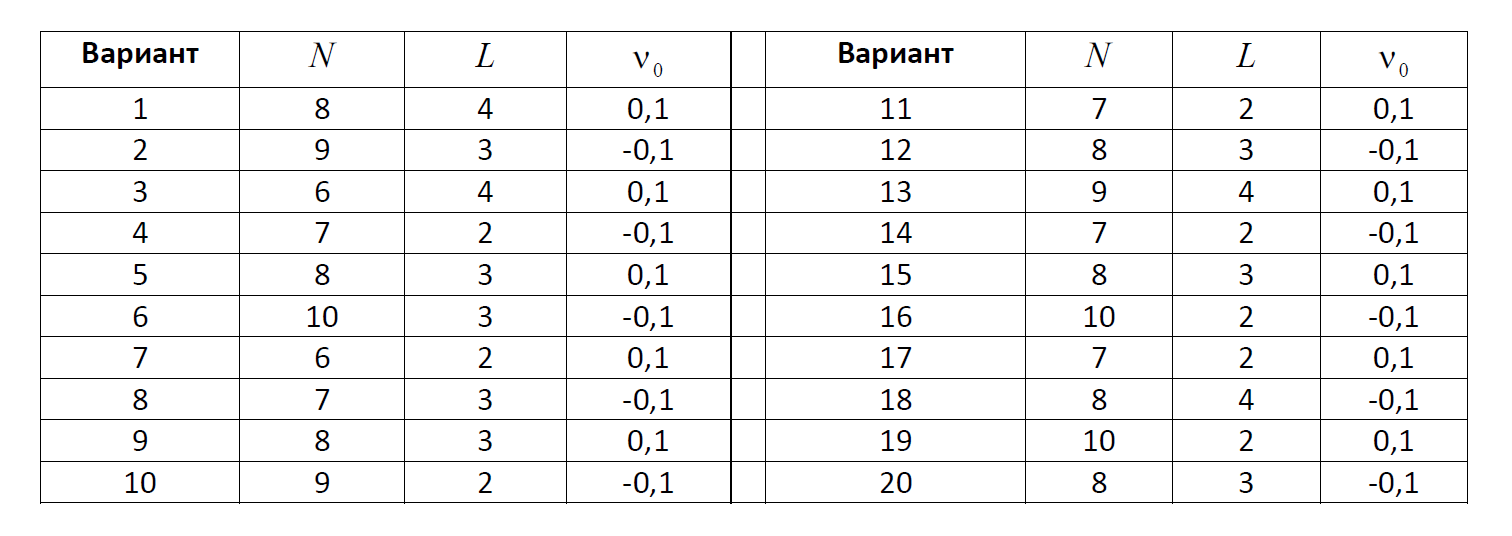

## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

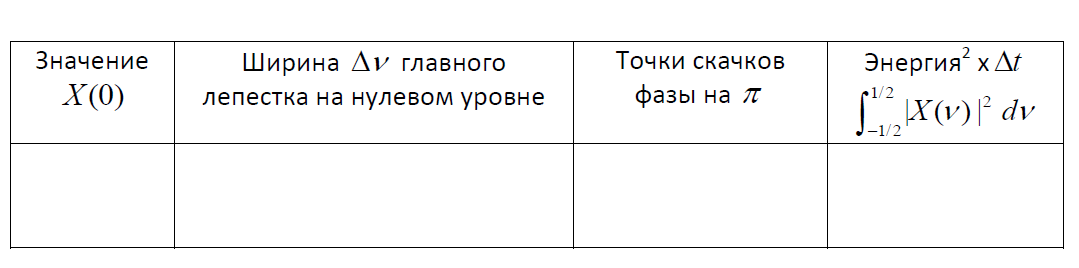

$^2$ Для дискретного сигнала рассматривают энергию, приходящуюся на один период частоты, т.е. на полосу частот шириной ${{f}_{\text{д}}}$:

$\int_{-0,5{{f}_{\text{д}}}}^{0,5{{f}_{\text{д}}}}{|}X(f){{|}^{2}}df=\frac{1}{\Delta t}\int_{-1/2}^{1/2}{|}X(\nu ){{|}^{2}}d\nu $
Для ее вычисления можно воспользоваться равенством Парсеваля для ДВПФ. 


In [6]:

pip install pydsm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 552 kB 5.1 MB/s 
  Created wheel for pydsm: filename=pydsm-0.14.0.0-cp38-cp38-linux_x86_64.whl size=753800 sha256=f0232984e1d83342a3712a7662249422862d249d7bd15feec9b9193c67d1482e
  Stored in directory: /root/.cache/pip/wheels/fe/74/68/3786a1791c69c464760f040fbad2e5cc0e654ec16b778c3ab7
Successfully built pydsm


In [7]:
import pydsm

In [38]:
# зададим константы
N = 9
L = 3
nu_0 = -0.1

# зададим посследовательность отсчетов
k = np.array(range(N))

# функция 1[k]
def single_impulse(k):
  if k == 0: return 1
  else: return 0

# функция, возвращающая последовательность дискретных сигналов (принимает количество сигналов в последовательности)
def x_k(M):
  x_k = np.full((M), 0.0)
  for k in range(len(x_k)):
    for m in range(N):
      x_k[k] += single_impulse(k-m)
  return x_k
     

In [39]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k(N+10))

# диапазон приведенных частот
nu_range = np.linspace(-0.5, 0.5, 1000)

X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
X_arg_range = np.angle([X(nu) for nu in nu_range])
     

<ipython-input-40-b2f9b1a78411>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(range(len(x_k(N+10)))), x_k(N+10), 'b', 'bo')


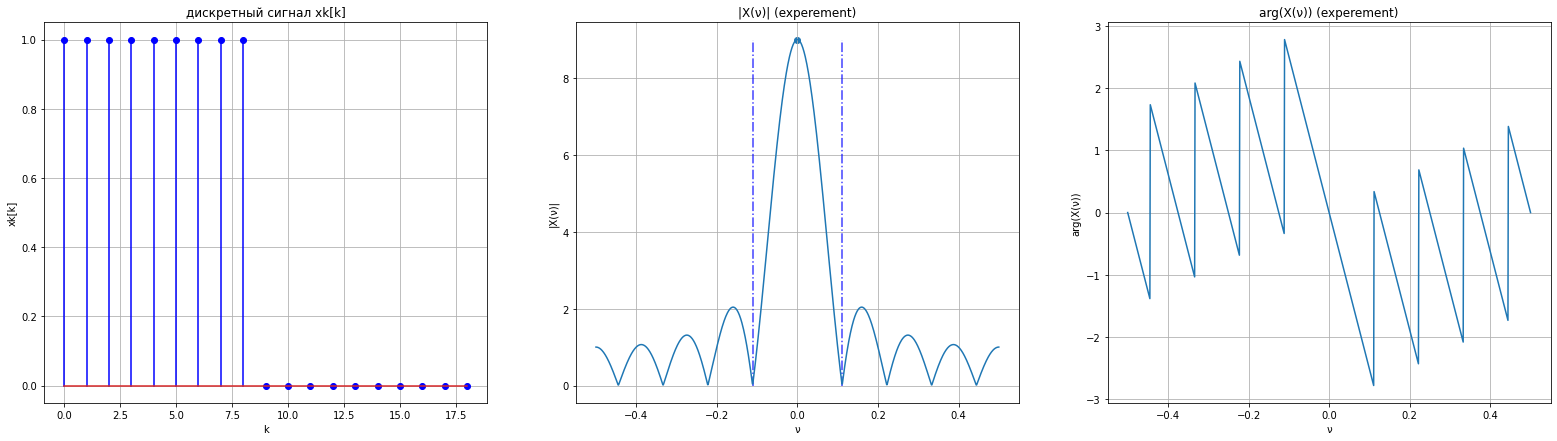

In [40]:
plt.figure(figsize=(27, 7))

plt.subplot(1, 3, 1)
plt.stem(np.array(range(len(x_k(N+10)))), x_k(N+10), 'b', 'bo')
plt.title(r'дискретный сигнал xk[k]')
plt.xlabel('k') 
plt.ylabel(r'xk[k]') 
plt.grid()

plt.subplot(1, 3, 2)
# проверяем результаты, полученные анаилтически на эксперементальном графике
# расположение крайних нулей и значение ДВПФ в 0
plt.vlines(1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)
plt.vlines(-1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.scatter(0, N)

plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (experement)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(nu_range, X_arg_range)
plt.title(r'arg(X(ν)) (experement)')
plt.ylabel(r'arg(X(ν))')
plt.xlabel(r'ν')
plt.grid()
     

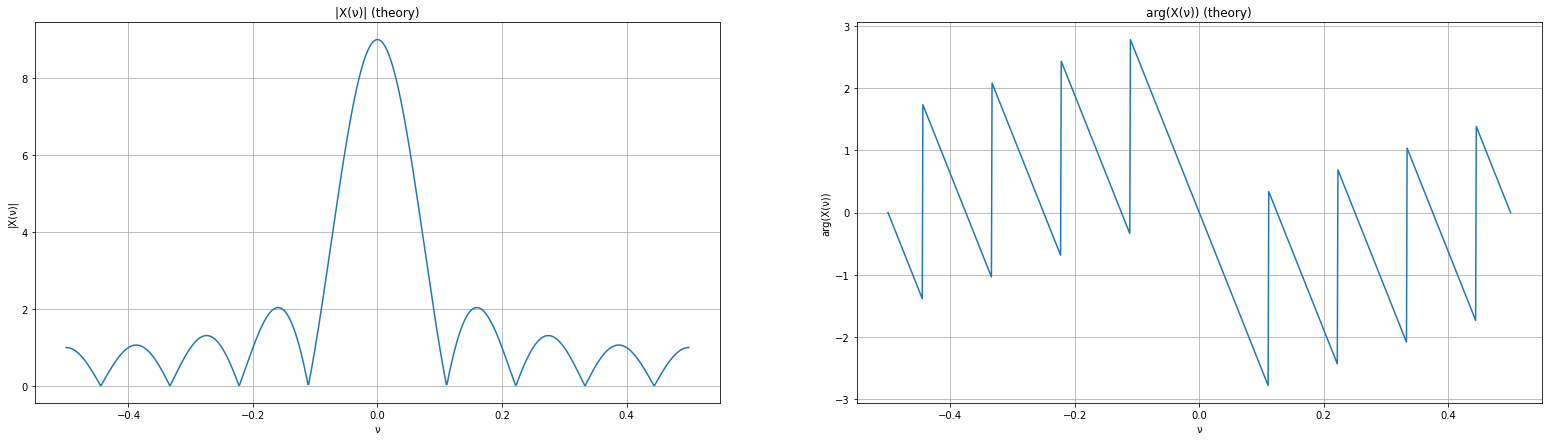

In [41]:
analytic_Xn = lambda nu : (1 - np.exp(- 2j * math.pi * nu * N)) / (1 - np.exp(- 2j * math.pi * nu))
     
plt.figure(figsize=(27, 7))

plt.subplot(1, 2, 1)
plt.plot(nu_range, abs(analytic_Xn(nu_range)))
plt.title(r'|X(ν)| (theory)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, np.angle(analytic_Xn(nu_range)))
plt.title(r'arg(X(ν)) (theory)')
plt.ylabel(r'arg(X(ν))')
plt.xlabel(r'ν')
plt.grid()

## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$ и сравните результат с ${{X}_{N}}(\nu L)$ (из задачи 1.1).


<ipython-input-42-8e9087502eda>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(range(len(x_L(2*N+10)))), x_L(2*N+10), 'b', 'bo')


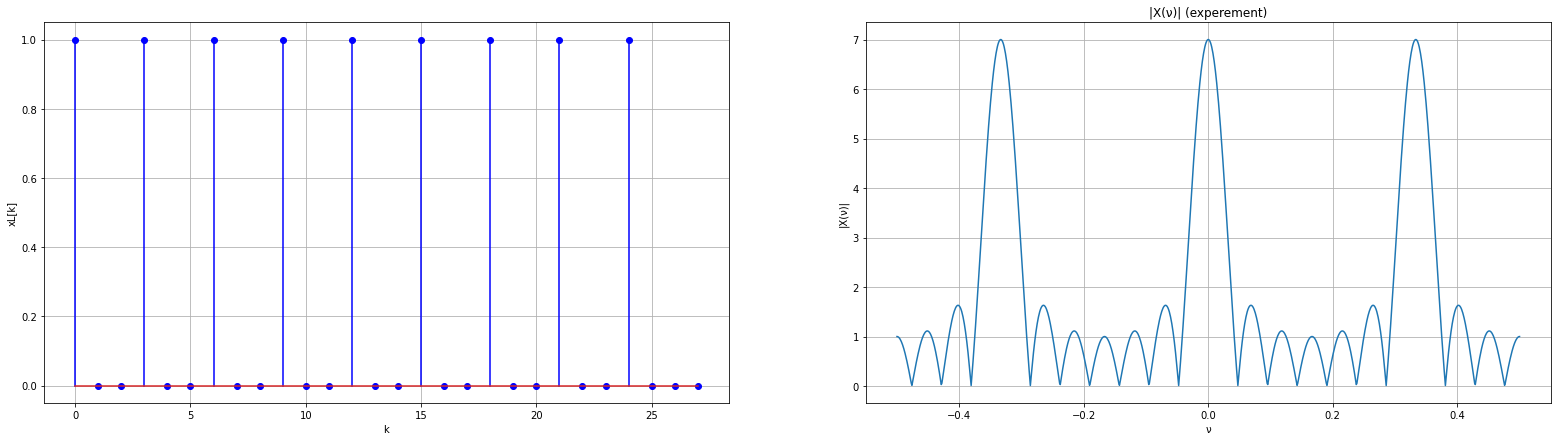

In [42]:
# по аналогии с 1.1 зададим последовательность сигналов x_L (функция принимает количество сигналов в последовательности)
def x_L(M):
  x_L = np.full((M), 0.0)
  for k in range(len(x_L)):
    for m in range(N):
      x_L[k] += x_k(M)[m] * single_impulse(k - m*L)
  return x_L
     

X = pydsm.ft.dtft(x_L(N+10))

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
     

plt.figure(figsize=(27, 7))

plt.subplot(1, 2, 1)
plt.stem(np.array(range(len(x_L(2*N+10)))), x_L(2*N+10), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'xL[k]') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (experement)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

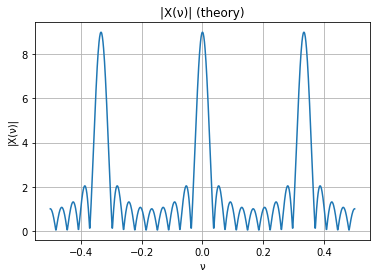

In [43]:
plt.plot(nu_range, abs(analytic_Xn(nu_range * L)))
plt.title(r'|X(ν)| (theory)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 

** Получить численным или символьным дифференцированием график для $\frac{j}{2\pi }\frac{d{{X}_{N}}(\nu )}{d\nu }$ и сравнить его с ${{X}_{D}}(\nu ).$ 


<ipython-input-44-40f39012b1fa>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_D, 'b', 'bo')


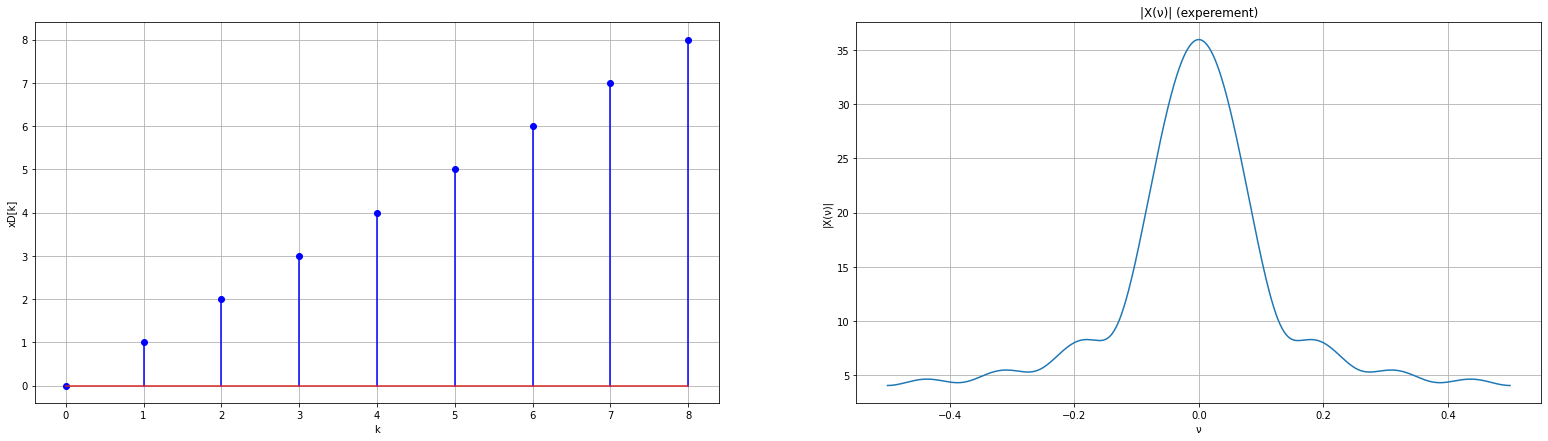

In [44]:
x_D = x_k(N) * k
     


X = pydsm.ft.dtft(x_D)

nu_range = np.linspace(-0.5, 0.5, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
     

plt.figure(figsize=(27, 7))

plt.subplot(1, 2, 1)
plt.stem(k, x_D, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'xD[k]') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (experement)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

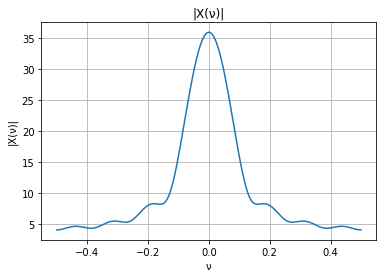

In [45]:
pi = math.pi
cos = np.cos
sin = np.sin
exp = np.exp

analytic_XD = lambda f : 0.5j * exp(-1j*(N - 1)*f) * ((N*cos(f*N)*sin(f) - sin(f*N)*cos(f))/(sin(f)**2) - 1j *(N-1)* (sin(f*N) / sin(f)))

XD_range = abs(analytic_XD(nu_range*pi))

plt.plot(nu_range, XD_range)
plt.title(r'|X(ν)|')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. Приведите ответы на следующие вопросы.

а) Какую аналитическую форму записи имеет функция ${{X}_{S}}(\nu )$?

б) Как результат моделирования соотносится с теоремой смещения для ДВПФ? 

в) Почему получившийся спектр не симметричен относительно нулевой частоты? 


<ipython-input-46-aafcacf8b588>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_s, 'b', 'bo')
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


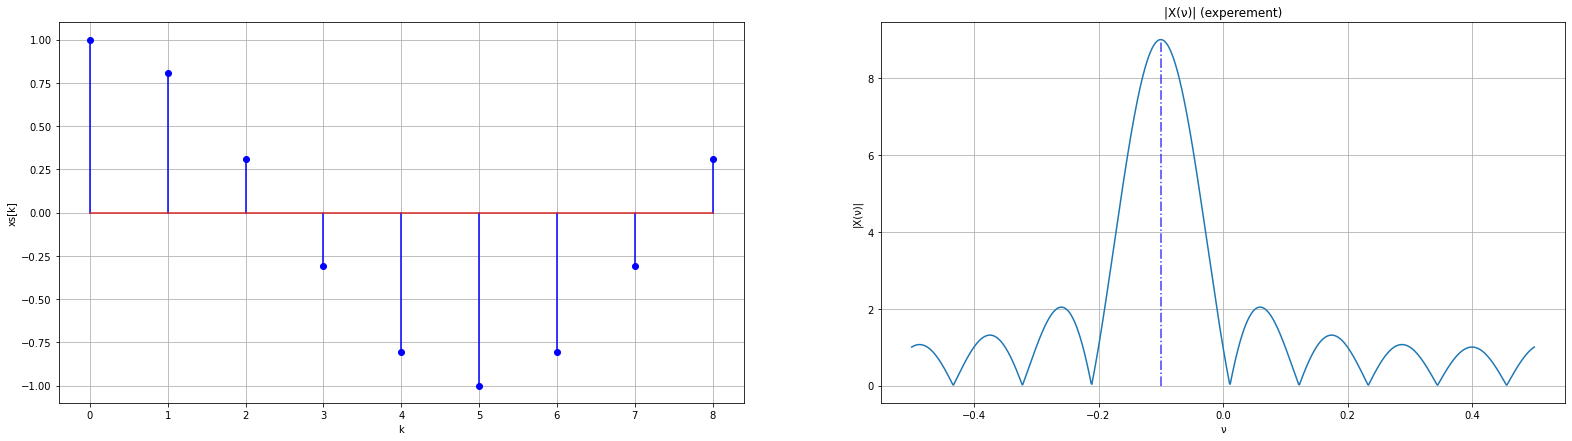

In [46]:
x_s = x_k(N) * np.exp(2j * math.pi * nu_0 * k)
     


X = pydsm.ft.dtft(x_s)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
     


plt.figure(figsize=(27, 7))

plt.subplot(1, 2, 1)
plt.stem(k, x_s, 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'xs[k]') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.vlines(nu_0, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.title(r'|X(ν)| (experement)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

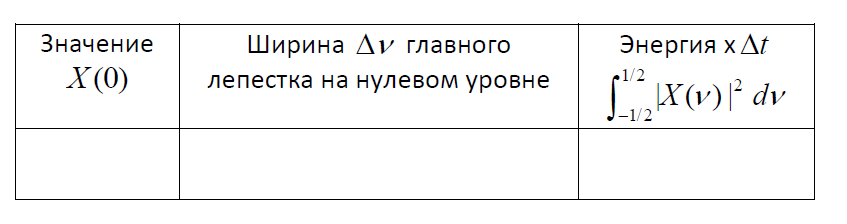

<ipython-input-47-6c3e06b0e2b3>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(range(len(convolution(x_k, x_k, 5*N)))), convolution(x_k, x_k, 5*N), 'b', 'bo')


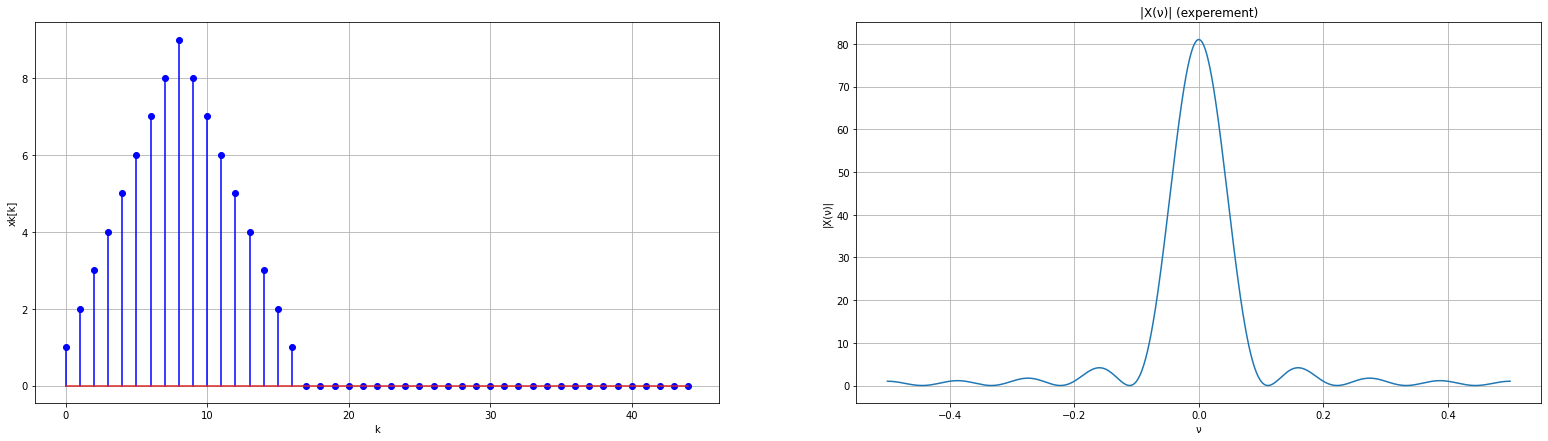

In [47]:
# зададим функцию свертки двух произвольных дискретных сигналов sid1_k и sig2_k (M -- количество импульсов в результируещем ряде)
def convolution(sig1_k, sig2_k, M):
  x = np.full((M), 0.0)
  for k in range(len(x)):
    for m in range(N):
      x[k] += sig1_k(M)[m] * sig2_k(M)[k-m]
  return x

# print(convolution(x_k, x_k, 5*N))
     


X = pydsm.ft.dtft(convolution(x_k, x_k, 5*N))
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])
     


plt.figure(figsize=(27, 7))

plt.subplot(1, 2, 1)
plt.stem(np.array(range(len(convolution(x_k, x_k, 5*N)))), convolution(x_k, x_k, 5*N), 'b', 'bo')
plt.xlabel('k') 
plt.ylabel(r'xk[k]') 
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (experement)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

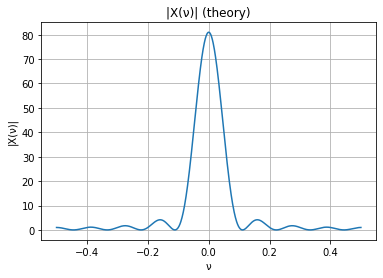

In [48]:
X = pydsm.ft.dtft(x_k(N)) # ДВПФ для одного дискретного сигнала 
analytic_convolution = lambda nu : X(nu)**2

X_abs_range = np.array([abs(analytic_convolution(nu)) for nu in nu_range])

plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (theory)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

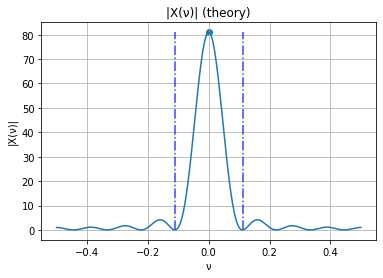

In [49]:
analytic_convolution = lambda nu : (np.sin(N*math.pi*nu)**2) / (np.sin(math.pi*nu)**2) * np.exp(-2j*(N - 1)*math.pi*nu)

X_abs_range = np.array([abs(analytic_convolution(nu)) for nu in nu_range])

plt.vlines(1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)
plt.vlines(-1/9, 0, max(X_abs_range), ls='-.', color='blue', alpha=0.75)

plt.scatter(0, N**2)

plt.plot(nu_range, X_abs_range)
plt.title(r'|X(ν)| (theory)')
plt.ylabel(r'|X(ν)|')
plt.xlabel(r'ν')
plt.grid()
     

# Занятие 2. Основные свойства ДПФ

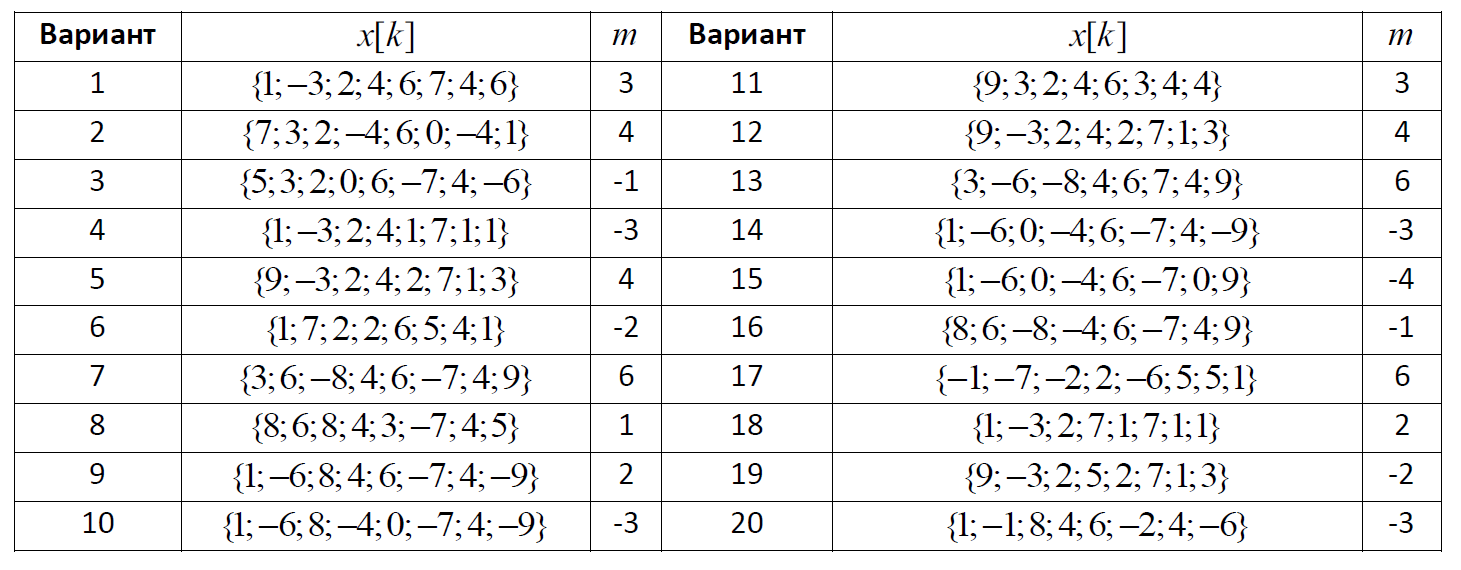

## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


In [22]:
from scipy.fft import fft, ifft


In [50]:
N = 8
m = 4
k = np.array(range(8))
x_k = np.array([7, 3, 2, -4, 6, 0, -4, 1])

assert np.shape(x_k)[0] == N


<ipython-input-51-18b54dcdbff5>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_k, 'b', 'bo')


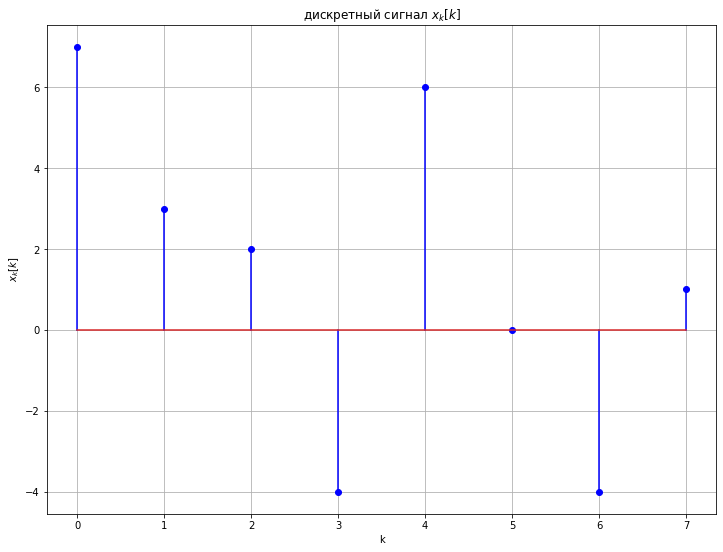

In [51]:
plt.figure(figsize=(12, 9))

plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x_k[k]$') 
plt.grid()


<ipython-input-52-5a5d78976109>:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, real_X_n, 'b', 'bo')
<ipython-input-52-5a5d78976109>:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, img_X_n, 'b', 'bo')
<ipython-input-52-5a5d78976109>:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the 

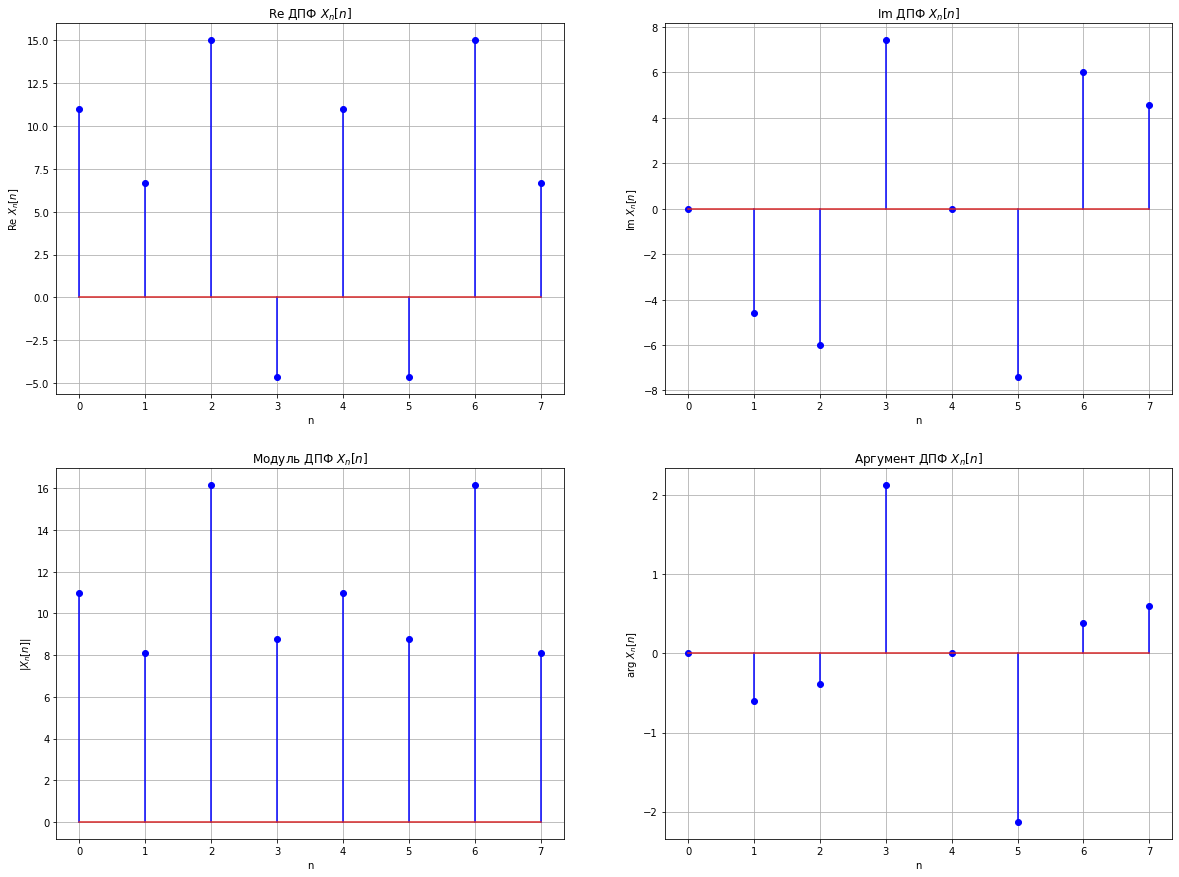

In [52]:
#построим матрицу дискретного преобразования Фурье
W = np.full((N, N), 0.0 + 0.0j)

for n in range(N):
   for k in range(N):
     W[n][k] = np.exp(-1j * 2*math.pi/N * n*k)

# print(W)

n = np.array(range(8))
X_n = np.dot(W, x_k)


     

plt.figure(figsize=(20, 15))

# реальная часть
real_X_n = np.array([X_n[i].real for i in range(N)])
# мнимая часть
img_X_n = np.array([X_n[i].imag for i in range(N)])
# модуль
abs_X_n = np.array([abs(X_n[i]) for i in range(N)])
# аргумент
angle_X_n = np.angle(X_n)

plt.subplot(2,2,1)
plt.stem(n, real_X_n, 'b', 'bo')
plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Re $X_n[n]$') 
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, img_X_n, 'b', 'bo')
plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Im $X_n[n]$') 
plt.grid()

plt.subplot(2,2,3)
plt.stem(n, abs_X_n, 'b', 'bo')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|X_n[n]|$') 
plt.grid()

plt.subplot(2,2,4)
plt.stem(n, angle_X_n, 'b', 'bo')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'arg $X_n[n]$') 
plt.grid()


<ipython-input-53-88497eb7c693>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, fft(x_k).real, 'b', 'bo')
<ipython-input-53-88497eb7c693>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, fft(x_k).imag, 'b', 'bo')
<ipython-input-53-88497eb7c693>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and swit

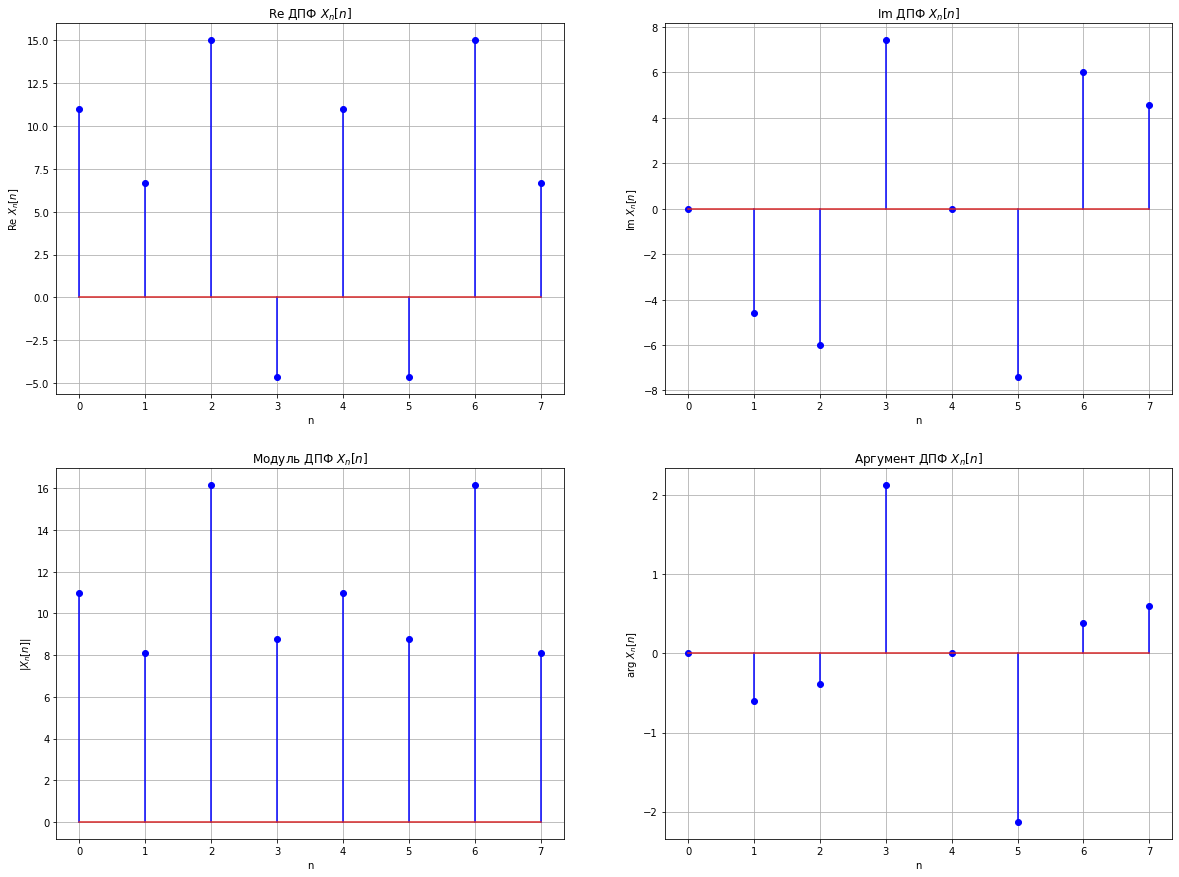

In [53]:
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
plt.stem(n, fft(x_k).real, 'b', 'bo')
plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Re $X_n[n]$') 
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, fft(x_k).imag, 'b', 'bo')
plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'Im $X_n[n]$') 
plt.grid()

plt.subplot(2,2,3)
plt.stem(n, abs(fft(x_k)), 'b', 'bo')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|X_n[n]|$') 
plt.grid()

plt.subplot(2,2,4)
plt.stem(n, np.angle(fft(x_k)), 'b', 'bo')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'arg $X_n[n]$') 
plt.grid()


## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 


In [54]:
eps=1e-6

print('='*50)
# attention: comparation of float
for i in range(1, N):
    if (real_X_n[i] - real_X_n[N-i]) < eps:
        print('Re X[n] = Re X[N-n] = %0.2f' %real_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (abs_X_n[i] - abs_X_n[N-i]) < eps:
        print('|X[n]| = |X[N-n]| = %0.2f' %abs_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (img_X_n[i] + img_X_n[N-i]) < eps:
        print('Im X[n] = - Im X[N-n] = %0.2f' %img_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (angle_X_n[i] + angle_X_n[N-i]) < eps:
        print('arg(X[n]) = -arg(X[N-n]) = %0.2f' %angle_X_n[i])
    else:
        print('Oooops, something goes wrong!')


Re X[n] = Re X[N-n] = 6.66
Re X[n] = Re X[N-n] = 15.00
Re X[n] = Re X[N-n] = -4.66
Re X[n] = Re X[N-n] = 11.00
Re X[n] = Re X[N-n] = -4.66
Re X[n] = Re X[N-n] = 15.00
Re X[n] = Re X[N-n] = 6.66
|X[n]| = |X[N-n]| = 8.08
|X[n]| = |X[N-n]| = 16.16
|X[n]| = |X[N-n]| = 8.76
|X[n]| = |X[N-n]| = 11.00
|X[n]| = |X[N-n]| = 8.76
|X[n]| = |X[N-n]| = 16.16
|X[n]| = |X[N-n]| = 8.08
Im X[n] = - Im X[N-n] = -4.59
Im X[n] = - Im X[N-n] = -6.00
Im X[n] = - Im X[N-n] = 7.41
Im X[n] = - Im X[N-n] = 0.00
Im X[n] = - Im X[N-n] = -7.41
Im X[n] = - Im X[N-n] = 6.00
Im X[n] = - Im X[N-n] = 4.59
arg(X[n]) = -arg(X[N-n]) = -0.60
arg(X[n]) = -arg(X[N-n]) = -0.38
arg(X[n]) = -arg(X[N-n]) = 2.13
arg(X[n]) = -arg(X[N-n]) = 0.00
arg(X[n]) = -arg(X[N-n]) = -2.13
arg(X[n]) = -arg(X[N-n]) = 0.38
arg(X[n]) = -arg(X[N-n]) = 0.60


## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 


<ipython-input-55-84c1184d7fd0>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n, abs(Y), 'b', 'bo')
<ipython-input-55-84c1184d7fd0>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, y, 'b', 'bo')
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Ca

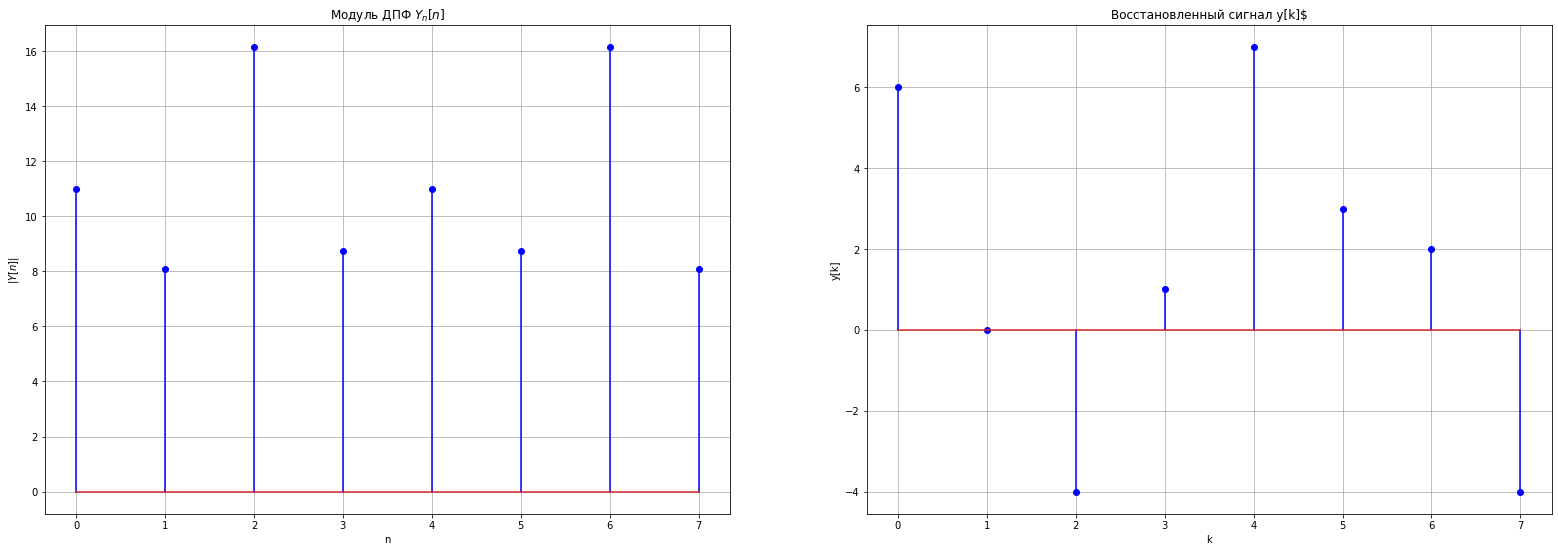

In [55]:
Y = np.exp(-1j * 2*math.pi / N * m * n) * X_n
y = ifft(Y)
k = np.array(range(8))




plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(n, abs(Y), 'b', 'bo')
plt.title(r'Модуль ДПФ $Y_n[n]$')
plt.xlabel('n') 
plt.ylabel(r'$|Y[n]|$') 
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', 'bo')
plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k') 
plt.ylabel(r'y[k]') 
plt.grid()



<ipython-input-56-7f1e3f742080>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_k, 'b', 'bo')
<ipython-input-56-7f1e3f742080>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, y, 'b', 'bo')
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Castin

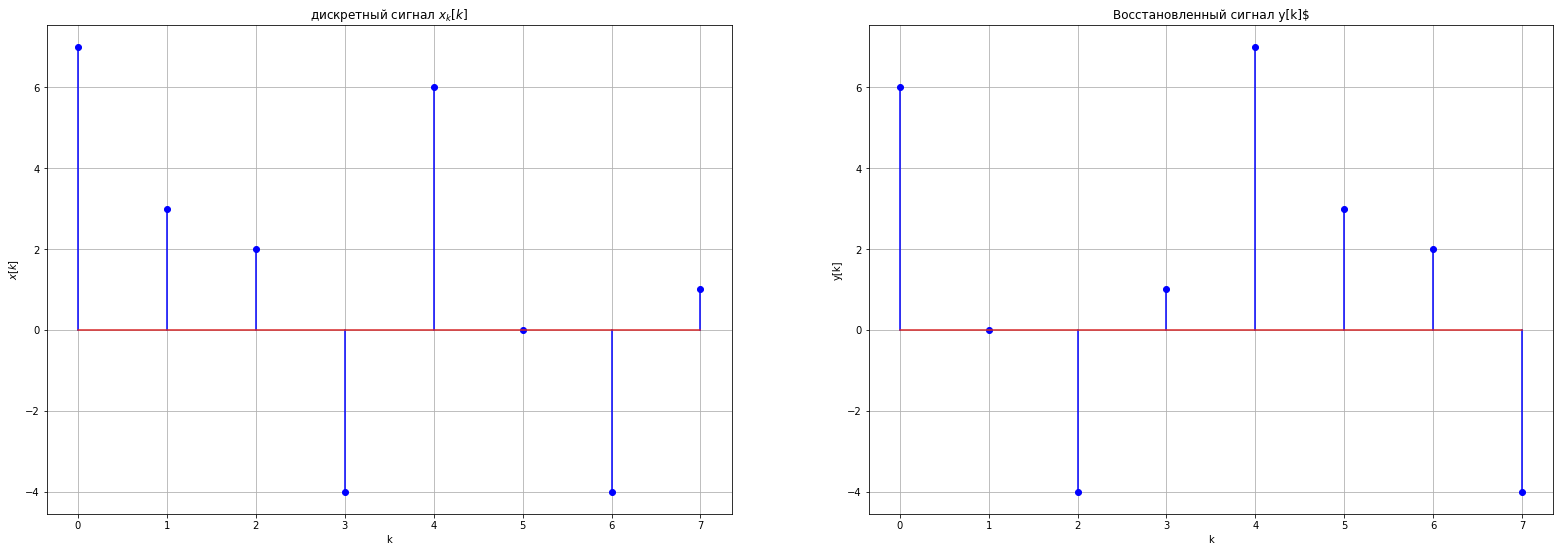

In [56]:
plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', 'bo')
plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k') 
plt.ylabel(r'y[k]') 
plt.grid()



# Занятие 3. Связь ДВПФ и ДПФ

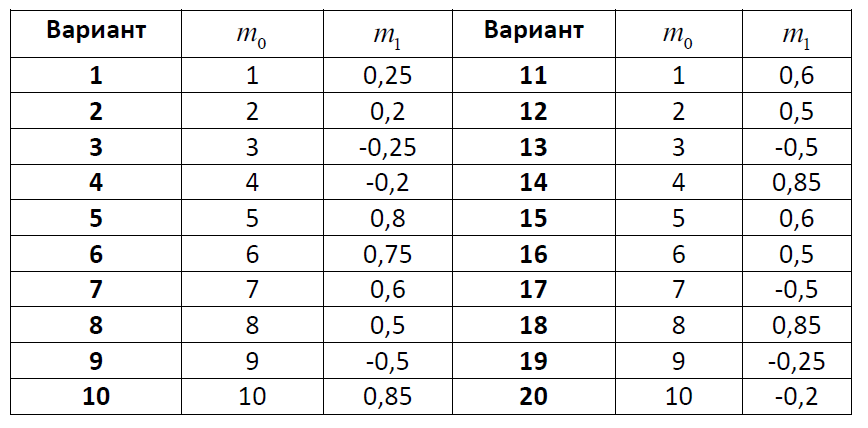

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=\left\{ \begin{array}{*{35}{l}}
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k.  \\
\end{array} \right.$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

In [57]:
N = 32
m0 = 2
m1 = 0.2


    

k = np.array(range(N))
n = np.array(range(N))
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)


<ipython-input-58-c67c395995f1>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_k, 'b', 'bo')
<ipython-input-58-c67c395995f1>:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n/N, abs(fft(x_k)), 'b', 'bo')


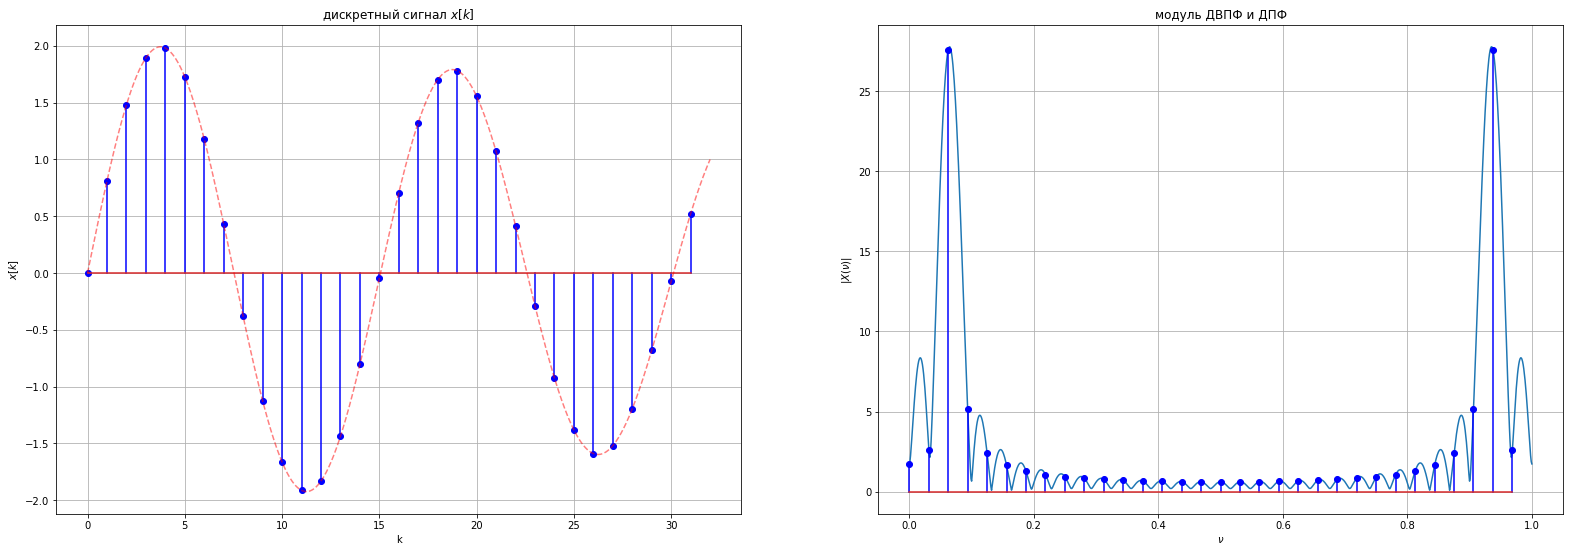

In [58]:
# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])


     


plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
# ============================================================================================
k_range = np.linspace(0, N, 1000)
x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(n/N, abs(fft(x_k)), 'b', 'bo')
plt.grid()



<ipython-input-59-9b15a6d382e6>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(range(N+M)), x_k, 'b', 'bo')
<ipython-input-59-9b15a6d382e6>:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', 'bo')


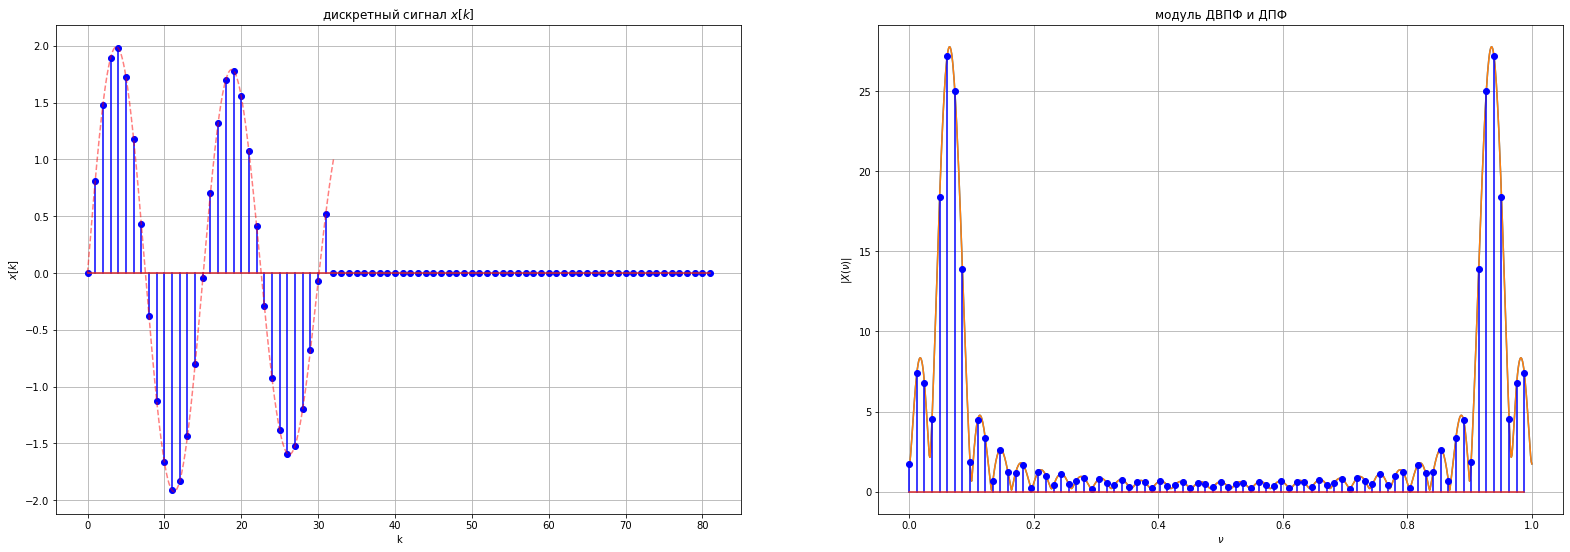

In [59]:
# расширим дискретный сигнал нулевыми отсчетами
M = 50
x_k = np.sin(2*math.pi / N * m0 * k) + np.sin(2*math.pi / N * (m0+0.25) * k)
x_k = np.concatenate((x_k, np.zeros(M)), None)

# ДВПФ для заданной последовательности (функция от nu)
X = pydsm.ft.dtft(x_k)
nu_range = np.linspace(0, 1, 1000)
X_abs_range = np.array([abs(X(nu)) for nu in nu_range])


     

plt.figure(figsize=(27, 9))

plt.subplot(1, 2, 1)
plt.stem(np.array(range(N+M)), x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
# ============================================================================================
k_range = np.linspace(0, N, 1000)
x_k_range = np.sin(2*math.pi / N * m0 * k_range) + np.sin(2*math.pi / N * (m0+0.25) * k_range)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(nu_range, X_abs_range)
plt.plot(nu_range, X_abs_range)
plt.title(r'модуль ДВПФ и ДПФ')
plt.ylabel(r'$|X(\nu)|$')
plt.xlabel(r'$\nu$')

plt.stem(np.array(range(M+N))/(N+M), abs(fft(x_k)), 'b', 'bo')
plt.grid()



## Задача 3.2. ДВПФ и ДПФ периодической последовательсти.

Простройте графики для действительной  и мнимой части коэффициентов ДПФ $\tilde{X}[n]$ периодической последовательности $x[k]=\cos \left( \frac{2\pi }{N}mk \right)+\sin \left( \frac{2\pi }{N}mk \right)$  с периодом $N=32$, для случаев $m={{m}_{0}}$ и $m={{m}_{0}}+{{m}_{1}}$. Получите аналитическую запись ДПФ. Сравните ДПФ последовательности с ее ДВПФ. Определите, выполняется ли связь между весами дельта-функций в ДВПФ и величинами отсчетов ДПФ. 

<ipython-input-60-5d8a82b81fb1>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_k, 'b', 'bo')
<ipython-input-60-5d8a82b81fb1>:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(N), X.real)
<ipython-input-60-5d8a82b81fb1>:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new be

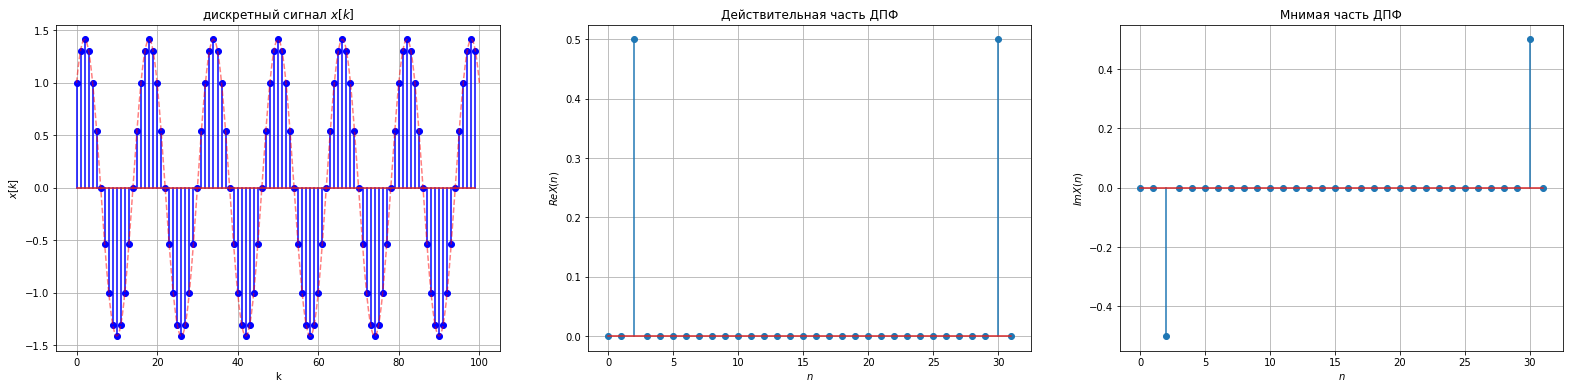

In [60]:
rg = 100

k = np.arange(rg)
m = m0
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure(figsize=(27, 6))

plt.subplot(1, 3, 1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
# ============================================================================================
k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

# вычислим значения ДПФ на одном периоде
X = np.array([1/N * np.dot(x_k[:N], np.exp(-1j*2*math.pi*k[:N]*n / N)) for n in range(N)])

plt.subplot(1, 3, 2)
plt.stem(np.arange(N), X.real)
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 3, 3)
plt.stem(np.arange(N), X.imag)
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()


<ipython-input-61-7a0d1cea3a44>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
<ipython-input-61-7a0d1cea3a44>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')


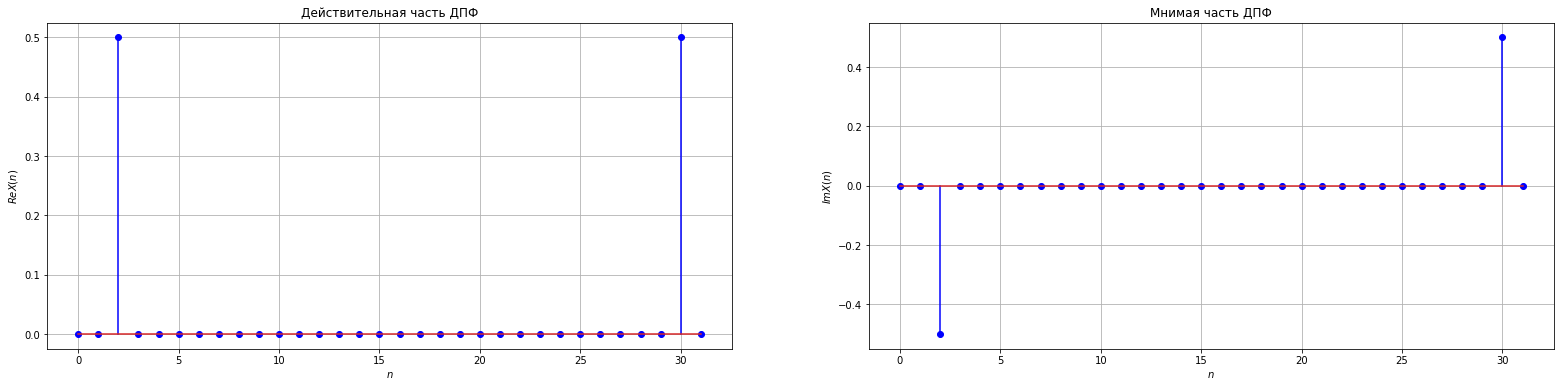

In [61]:
plt.figure(figsize=(27, 6))

plt.subplot(1, 2, 1)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 2, 2)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()


<ipython-input-62-b7a1cd5c6b43>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(k, x_k, 'b', 'bo')
<ipython-input-62-b7a1cd5c6b43>:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
<ipython-input-62-b7a1cd5c6b43>:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warnin

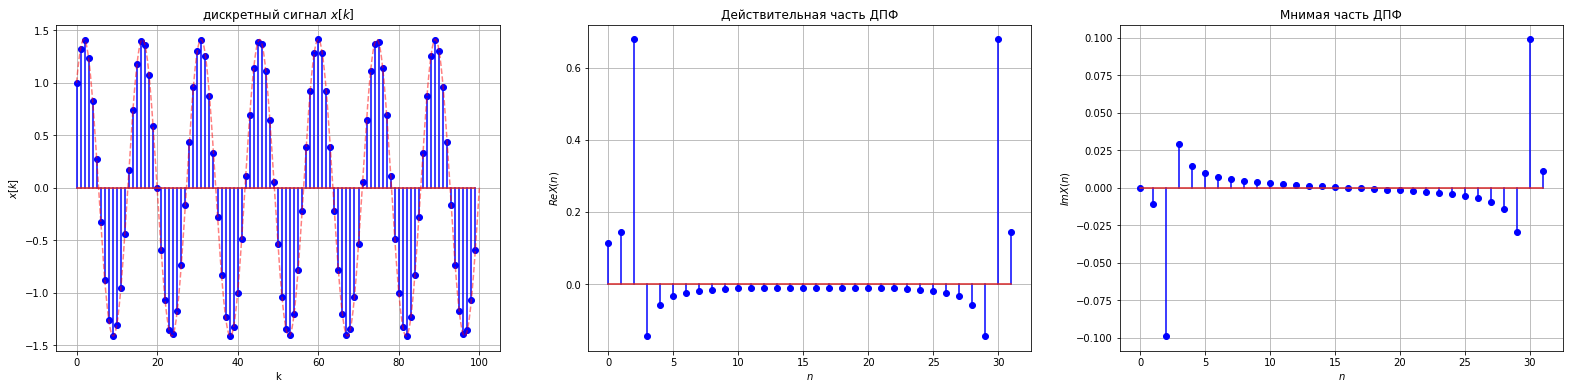

In [62]:
rg = 100

k = np.arange(rg)
m = m0 + m1
x_k = np.cos(2*math.pi*m*k / N) + np.sin(2*math.pi*m*k / N)

plt.figure(figsize=(27, 6))

plt.subplot(1, 3, 1)
plt.stem(k, x_k, 'b', 'bo')
plt.title(r'дискретный сигнал $x[k]$')
plt.xlabel('k') 
plt.ylabel(r'$x[k]$') 
# ============================================================================================
k_range = np.linspace(0,rg, 1000)
x_k_range = np.cos(2*math.pi*m*k_range / N) + np.sin(2*math.pi*m*k_range / N)
plt.plot(k_range, x_k_range, color='red', alpha=0.5, lw=1.5, ls='--')
# ============================================================================================
plt.grid()

plt.subplot(1, 3, 2)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).real, 'b', 'bo')
plt.title(r'Действительная часть ДПФ')
plt.ylabel(r'$Re X(n)$')
plt.xlabel(r'$n$')
plt.grid()

plt.subplot(1, 3, 3)
plt.stem(np.arange(N), 1/N*fft(x_k[:N]).imag, 'b', 'bo')
plt.title(r'Мнимая часть ДПФ')
plt.ylabel(r'$Im X(n)$')
plt.xlabel(r'$n$')
plt.grid()

# Примеры вычислений на Python для лабораторной работы №2 "ДВПФ и ДПФ"

## Задание последовательности отсчетов

Зададим последовательность из 10 единичных импульсов $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

In [ ]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Сделаем тоже самое с помощью функции `ones`

In [ ]:
w1=np.ones(10)
w1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Выведем график последовательности $w[k] = \sum_{m=0}^{N-1} \mathbf{1}[k-m]$

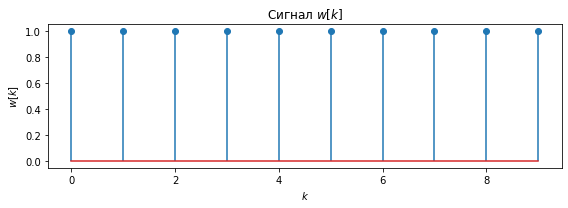

In [ ]:
N=len(w)
k = np.arange(N)
plt.figure(figsize=[8, 3])
plt.stem(k, w)
plt.title('Сигнал $w[k]$')
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.tight_layout()

Определим последовательность вида $y[k]=\exp(j2\pi \nu_0 k) w[k]$

In [ ]:
k = np.arange(N)
nu_0 = 0.25
y=np.exp(1j*2*np.pi*nu_0*k)
y

array([ 1.0000000e+00+0.0000000e+00j,  6.1232340e-17+1.0000000e+00j,
       -1.0000000e+00+1.2246468e-16j, -1.8369702e-16-1.0000000e+00j,
        1.0000000e+00-2.4492936e-16j,  3.0616170e-16+1.0000000e+00j,
       -1.0000000e+00+3.6739404e-16j, -4.2862638e-16-1.0000000e+00j,
        1.0000000e+00-4.8985872e-16j,  5.5109106e-16+1.0000000e+00j])

Определим дискретную линейную свертку (Convolution) последовательности $w[k]$ c точно такой же последовательностью.

In [ ]:
w2=signal.convolve(w, w)
w2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

Выведем график для такой последовательности:

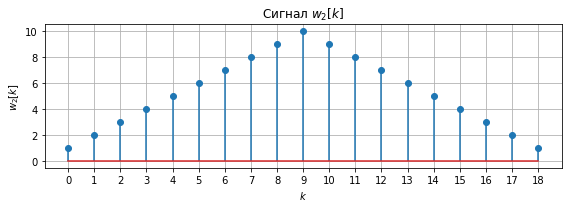

In [ ]:
N=len(w2)
k = np.arange(0, N)
plt.figure(figsize=[8, 3])
plt.stem(k, w2)
plt.title('Сигнал $w_2[k]$')
plt.xlabel('$k$')
plt.ylabel('$w_2[k]$')
plt.grid()
plt.xticks(k)
plt.tight_layout()

Поэлементное умножение задается оператором `*`

In [ ]:
w2*w2

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100,  81,  64,  49,
        36,  25,  16,   9,   4,   1])

## Вычисление ДВПФ

Определим ДВПФ последовательности $w[k]=\sum_{m=0}^{N-1} \mathbf{1}[k-m]$ 

In [ ]:
def dtft(x, M=2048):
    return  np.arange(M)/M-0.5, np.fft.fftshift(np.fft.fft(x, M))

In [ ]:
nu, W = dtft(w, M=2048)

* `nu` — массив частот $\nu \in [-0.5;0.5)$ с шагом сетки $\Delta \nu =1/M$,
* `W` — значения ДВПФ $W(\nu )$ в этих точках, 
* `dtft` — функция, 
* `w` — последовательность отсчетов, 
* `M` — число точек на сетки оси частот, в которых вычисляется ДВПФ. 

Построим график для модуля ДВПФ

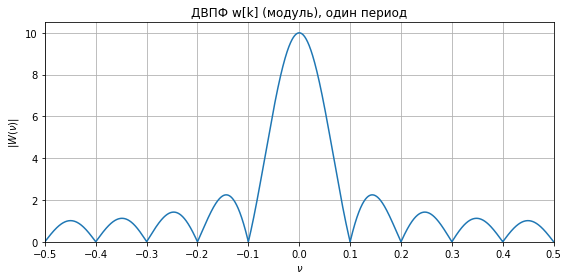

In [ ]:
plt.figure(figsize=[8, 4])
nu, W = dtft(w, M=2048)
plt.plot(nu, abs(W))

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ w[k] (модуль), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$|W(\\nu)|$')

plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Теперь выведем фазовую часть ДВПФ

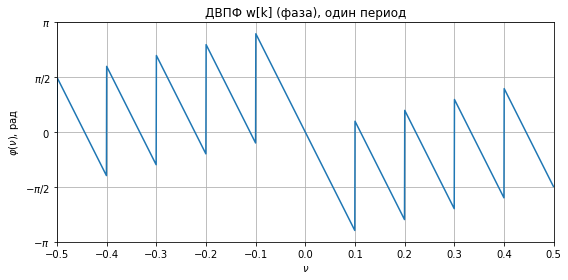

In [ ]:
plt.figure(figsize=[8, 4])
plt.plot(nu, np.angle(W))
plt.xlim([-0.5, 0.5])
plt.ylim([-np.pi, np.pi])
plt.title('ДВПФ w[k] (фаза), один период')
plt.xlabel('$\\nu$')
plt.ylabel('$\\varphi(\\nu)$, рад')
plt.yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], labels=("$-\\pi$", "$-\\pi/2$", "$0$", "$\\pi/2$", "$\\pi$"))
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

## Вычисление ДПФ

Вычислим ДПФ $N$-точечной последовательности

$$x[k]=\sin \left(2\pi \frac{2}{N}k\right)+\cos \left(2\pi \frac{3}{N}k\right),\;\;k=0,1,\dots ,N-1,\;\;N=8.$$

Формула прямого ДПФ в данном случае без нормирующего множителя $1/N$:
$$X[n]=\sum_{k=0}^{N-1} x[k]\exp \left(-j2\pi \frac{nk}{N}\right)$$
Сначала воспользуемся матричной формой ДПФ. Функция `scipy.linalg.dft(N)` возвращает матрицу ДПФ $[W]_N$ размера $N\times N$. 


In [ ]:
N=8
k=np.arange(N)
x=np.sin(2*np.pi*2/N*k)+np.cos(2*np.pi*3/N*k)
W8 = dft(N)
Xn = W8 @ x
Xn

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.13832009e-16-4.00000000e+00j,  4.00000000e+00+2.22044605e-16j,
        1.33226763e-15+7.88860905e-31j,  4.00000000e+00+4.66293670e-15j,
       -5.01463715e-15+4.00000000e+00j,  0.00000000e+00-2.66453526e-15j])

Построим графики. 

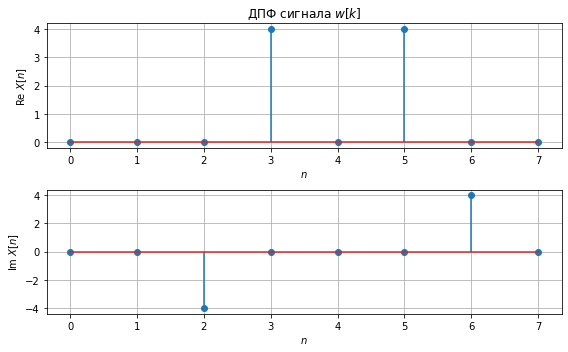

In [ ]:
plt.figure(figsize=[8, 5])

n=np.arange(N)
plt.subplot(2, 1, 1)
plt.stem(n, Xn.real)
plt.xticks(n)
plt.title('ДПФ сигнала $w[k]$')
plt.xlabel('$n$')
plt.ylabel('Re $X[n]$')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(n, Xn.imag)
plt.xticks(n)
plt.xlabel('$n$')
plt.ylabel('Im $X[n]$')

plt.grid()
plt.tight_layout()

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ). Для этого воспользуемся функцией `np.fft.fft()`.


In [ ]:
Xn1=np.fft.fft(x)
Xn1

array([-3.09256603e-17+0.00000000e+00j,  4.44089210e-16+9.15390196e-17j,
       -1.07929736e-15-4.00000000e+00j,  4.00000000e+00-1.86789586e-15j,
        1.30134197e-15+0.00000000e+00j,  4.00000000e+00+1.86789586e-15j,
       -1.07929736e-15+4.00000000e+00j,  4.44089210e-16-9.15390196e-17j])

Сравним результаты.

In [ ]:
max(abs(Xn1-Xn))

4.034322756779725e-15

## Вычисление обратного ДПФ


Матрица обратного ДПФ может быть найдена как обратная матрица для $[W]_N$.

In [ ]:
W8_inv1 = np.linalg.inv(W8)

Также ее можно получить с помощью транспонирования и комплексного сопряжения (эрмитова сопряжения) c дополнительной нормировкой на $N$, в силу того, что $[W]_N^{-1} =\frac{1}{N}{\left([W]_N^T \right)}^* =\frac{1}{N}[W]_N^*$. 


In [ ]:
W8_inv2 = np.conjugate(W8) / N

Вычислим обратное ДПФ, используя матричную форму. Сравним результат с исходной последовательностью. 


In [ ]:
x1 = W8_inv1 @ Xn
max(abs(x1-x))

7.901860134932568e-16

Выполним те же вычисления с использованием алгоритма БПФ. Для этого нам понадобится функция `np.fft.ifft()`

In [ ]:
x2=np.fft.ifft(Xn)
max(abs(x2-x))

1.4861185472553567e-15

## Интерполяция ДВПФ добавлением нулевых отсчетов

Построим на одном графике модули ДПФ и ДВПФ $N$-точечной последовательности ($N=16$)

$$x[k]=\sin \left(2\pi \frac{5.5}{16} k \right),\;\;k=0,1,\dots ,N-1.$$

In [ ]:
N=16
k=np.arange(N)
n=np.arange(N)
x=np.sin(2*np.pi*5.5*k/N)

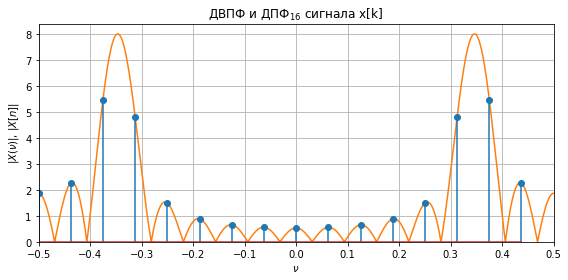

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

M=N
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

Здесь функция `np.fft.fftshift` позволяет циклически сдвинуть вычисленные отсчеты ДПФ так, чтобы они соответствовали частотам$\nu_n \in [-0.5;0.5)$, $\nu_n =-0.5+\frac{n}{N}.$

Относительная частота синусойды $\nu_0 =\frac{6.5}{16}$ не попадет на сетку частот ДПФ. В результате спектральные максимумы недостаточно хорошо визуализируются отсчетами ДПФ. Чтобы это улучшить, добавим к последовательности, используемой при вычислении ДПФ, нулевые отсчеты в конец сигнала. Для этого досточно указать второй параметр функции `np.fft.fft(x, M)` равный новому числу отсчетов. 


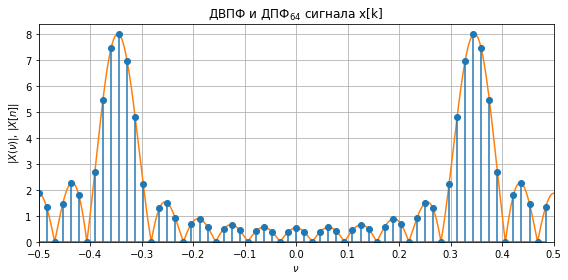

In [ ]:
plt.figure(figsize=[8, 4])


nu, X = dtft(x, M=2048)
plt.plot(nu, abs(X), 'C1')

Nz=48
M=N+Nz
plt.stem(np.arange(M)/M-0.5, abs(np.fft.fftshift(np.fft.fft(x, M))), linefmt='C0', markerfmt='C0o')

plt.xlim([-0.5, 0.5])
plt.ylim(bottom=0)
plt.title('ДВПФ и ДПФ$_{%i}$ сигнала x[k]' %M)
plt.xlabel('$\\nu$')
plt.ylabel('$|X(\\nu)|$, $|X[n]|$')
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()